We will use the daily spreadsheet from EU CDC containing new cases and deaths per country per day.

In [18]:
!wget -N https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx

--2020-05-28 13:56:29--  https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx
Resolving www.ecdc.europa.eu (www.ecdc.europa.eu)... 2600:9000:21c7:8200:1d:d83a:40c0:93a1, 2600:9000:21c7:4600:1d:d83a:40c0:93a1, 2600:9000:21c7:f200:1d:d83a:40c0:93a1, ...
Connecting to www.ecdc.europa.eu (www.ecdc.europa.eu)|2600:9000:21c7:8200:1d:d83a:40c0:93a1|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘COVID-19-geographic-disbtribution-worldwide.xlsx’ not modified on server. Omitting download.



Get Pandas and NumPy for feature engineering and calculations and get plots inline.

In [19]:
import pandas as pd
import numpy  as np

%matplotlib inline

We read our dataframe directly from the downloaded Excel file and have a look at the first 10 lines for format. Data for Namibia caused missing values because the `geoId` is __NA__, so we disable interpretation of missing values.

In [20]:
df = pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx', keep_default_na=False, na_values='')
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-28,28,5,2020,625,7,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-27,27,5,2020,658,1,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-26,26,5,2020,591,1,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-25,25,5,2020,584,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-24,24,5,2020,782,11,Afghanistan,AF,AFG,37172386.0,Asia
5,2020-05-23,23,5,2020,540,12,Afghanistan,AF,AFG,37172386.0,Asia
6,2020-05-22,22,5,2020,531,6,Afghanistan,AF,AFG,37172386.0,Asia
7,2020-05-21,21,5,2020,492,9,Afghanistan,AF,AFG,37172386.0,Asia
8,2020-05-20,20,5,2020,581,5,Afghanistan,AF,AFG,37172386.0,Asia
9,2020-05-19,19,5,2020,408,4,Afghanistan,AF,AFG,37172386.0,Asia


Last check of our source dataframe.

In [21]:
df.count()

dateRep                    19875
day                        19875
month                      19875
year                       19875
cases                      19875
deaths                     19875
countriesAndTerritories    19875
geoId                      19875
countryterritoryCode       19667
popData2018                19599
continentExp               19875
dtype: int64

We pivot to a country by column format.

In [22]:
df_geo = df.pivot(index='dateRep', columns='geoId', values=['cases', 'deaths'])
df_geo

cases                                                         ...  \
geoId         AD     AE     AF   AG   AI    AL     AM   AO     AR    AT  ...   
dateRep                                                                  ...   
2019-12-31   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-01   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-02   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-03   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
2020-01-04   NaN    0.0    0.0  NaN  NaN   NaN    0.0  NaN    NaN   0.0  ...   
...          ...    ...    ...  ...  ...   ...    ...  ...    ...   ...  ...   
2020-05-24   0.0  812.0  782.0  0.0  0.0   8.0  374.0  0.0  704.0  46.0  ...   
2020-05-25   1.0  781.0  584.0  0.0  0.0   9.0  359.0  9.0  723.0  32.0  ...   
2020-05-26   0.0  822.0  591.0  0.0  0.0   6.0  452.0  0.0  552.0  20.0  ...   
2020-05-27   0.0  779.0  658.0  0.0  0.0  25.0  289.0  2.0  600.0  38.0  ...   
2020-05-28   0.0  883.0  625.0  0.0  0.0  21.0  372.0  0.0  705.0  18.0  ...   

           deaths                                                
geoId          VC   VE   VG   VI   VN   XK   YE    ZA   ZM   ZW  
dateRep                                                          
2019-12-31    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-01    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-02    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-03    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
2020-01-04    NaN  NaN  NaN  NaN  0.0  NaN  NaN   NaN  NaN  NaN  
...           ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  
2020-05-24    0.0  0.0  0.0  0.0  0.0  0.0  6.0  10.0  0.0  0.0  
2020-05-25    0.0  0.0  0.0  0.0  0.0  0.0  3.0  22.0  0.0  0.0  
2020-05-26    0.0  0.0  0.0  0.0  0.0  1.0  3.0  52.0  0.0  0.0  
2020-05-27    0.0  1.0  0.0  0.0  0.0  0.0  4.0  43.0  0.0  0.0  
2020-05-28    0.0  0.0  0.0  0.0  0.0  0.0  4.0  28.0  0.0  0.0  

[150 rows x 420 columns]

For predictions later on we need extra rows in our dataframe. One of the ways to do that is reindexing with a larger range, so we use the current range and add six months and check our latest date.

In [23]:
new_index = pd.date_range(df_geo.index.min(), df_geo.index.max() + pd.Timedelta('365 days'))
df_geo = df_geo.reindex(new_index)
df_geo

cases                                          ... deaths          \
geoId         AD   AE   AF  AG  AI  AL   AM  AO  AR   AT  ...     VC  VE  VG   
2019-12-31   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-01   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-02   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-03   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
2020-01-04   NaN  0.0  0.0 NaN NaN NaN  0.0 NaN NaN  0.0  ...    NaN NaN NaN   
...          ...  ...  ...  ..  ..  ..  ...  ..  ..  ...  ...    ...  ..  ..   
2021-05-24   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-25   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-26   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-27   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   
2021-05-28   NaN  NaN  NaN NaN NaN NaN  NaN NaN NaN  NaN  ...    NaN NaN NaN   

                                         
geoId       VI   VN  XK  YE  ZA  ZM  ZW  
2019-12-31 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-01 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-02 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-03 NaN  0.0 NaN NaN NaN NaN NaN  
2020-01-04 NaN  0.0 NaN NaN NaN NaN NaN  
...         ..  ...  ..  ..  ..  ..  ..  
2021-05-24 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-25 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-26 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-27 NaN  NaN NaN NaN NaN NaN NaN  
2021-05-28 NaN  NaN NaN NaN NaN NaN NaN  

[515 rows x 420 columns]

Most algorithms take numerical data as inputs for a model, so we add a column representing the date as days since the earliest date in the dataframe.

In [24]:
df_geo['daynum'] = (df_geo.index - df_geo.index.min()).days
df_geo['daynum'].describe()

count    515.000000
mean     257.000000
std      148.811962
min        0.000000
25%      128.500000
50%      257.000000
75%      385.500000
max      514.000000
Name: daynum, dtype: float64

Suppress warnings for multiple plots when analyzing many countries with `showplots = True`.

In [25]:
import matplotlib as mpl
mpl.rc('figure', max_open_warning = 0)

Running for multiple countries with a selection or simply all countries found in the input. Full documentation of the approach is found in the `Gumbelpivot` notebook.

US Res  0.484 at  87% of 1875848 start 2020-03-13 peak 2020-04-22 floor 2020-08-11 beta 19.550 mu 112.709
UK Res  0.059 at  85% of  304195 start 2020-03-14 peak 2020-04-22 floor 2020-08-08 beta 19.796 mu 113.074
BR Res  0.062 at  10% of 3544538 start 2020-03-27 peak 2020-07-10 floor 2021-05-04 beta 51.239 mu 192.094
CH Res  0.218 at 100% of   30782 start 2020-03-07 peak 2020-03-30 floor 2020-06-04 beta 11.366 mu  89.781
DE Res  0.553 at  98% of  181887 start 2020-03-08 peak 2020-04-05 floor 2020-06-16 beta 14.218 mu  95.501
IT Res  0.078 at  97% of  237418 start 2020-02-28 peak 2020-04-01 floor 2020-07-03 beta 16.882 mu  92.395
ES Res  0.708 at  99% of  238400 start 2020-03-05 peak 2020-04-02 floor 2020-06-22 beta 13.596 mu  92.684
PT Res  0.879 at  96% of   31908 start 2020-03-11 peak 2020-04-12 floor 2020-07-05 beta 16.030 mu 102.646
FR Res  0.178 at  98% of  148446 start 2020-03-08 peak 2020-04-05 floor 2020-06-17 beta 14.447 mu  95.963
SE Res  0.128 at  73% of   45735 start 2020-03

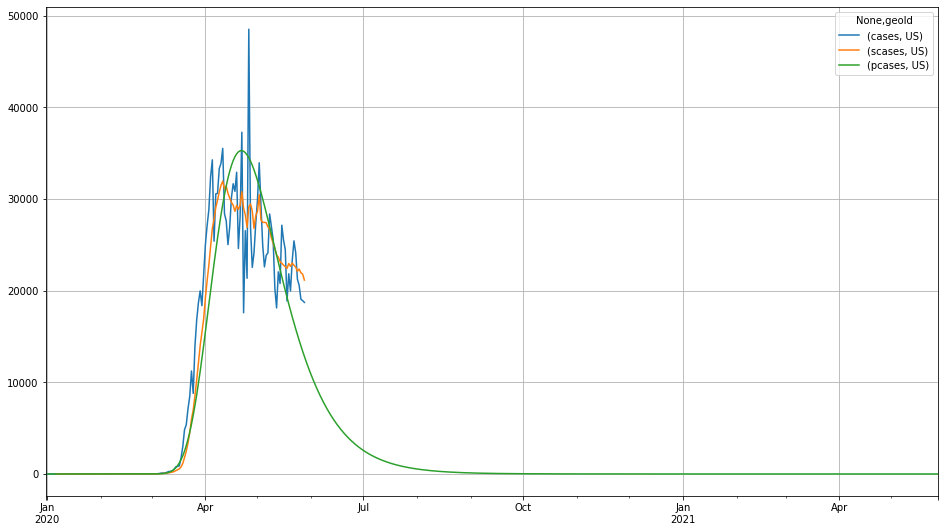

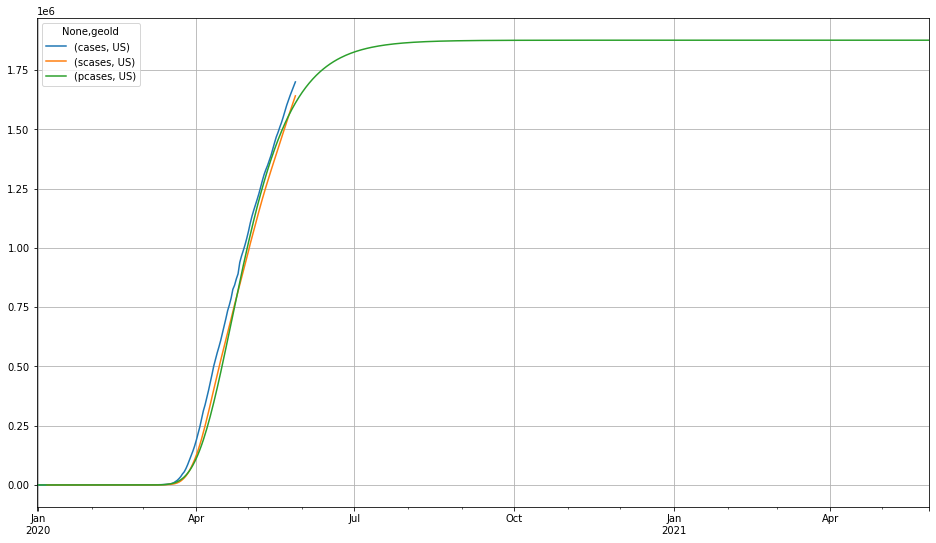

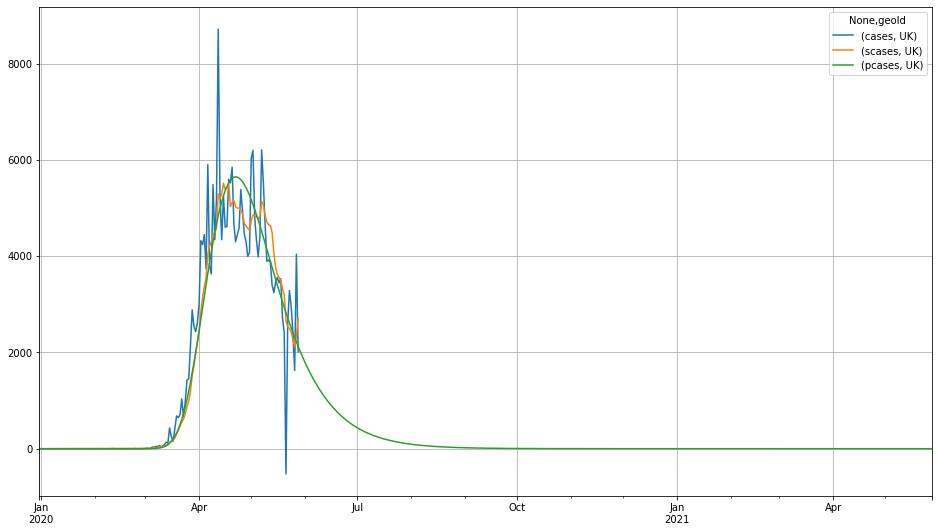

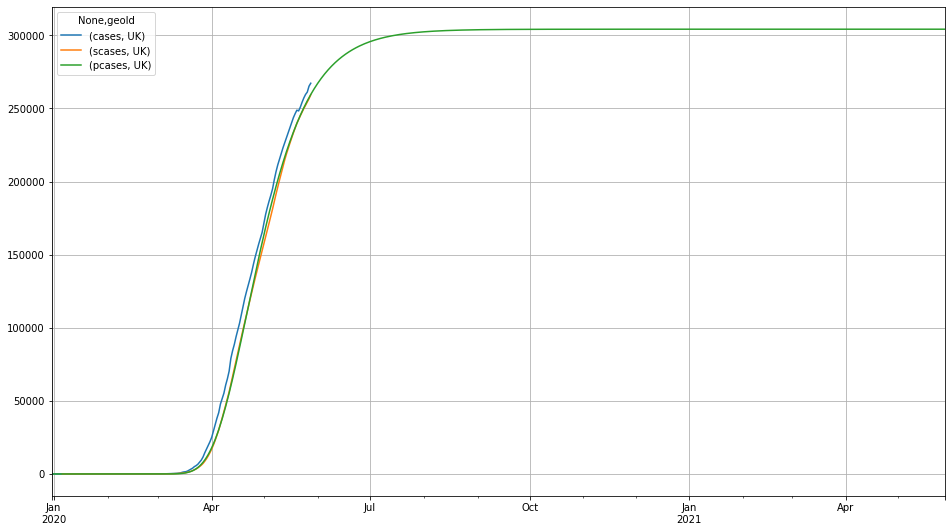

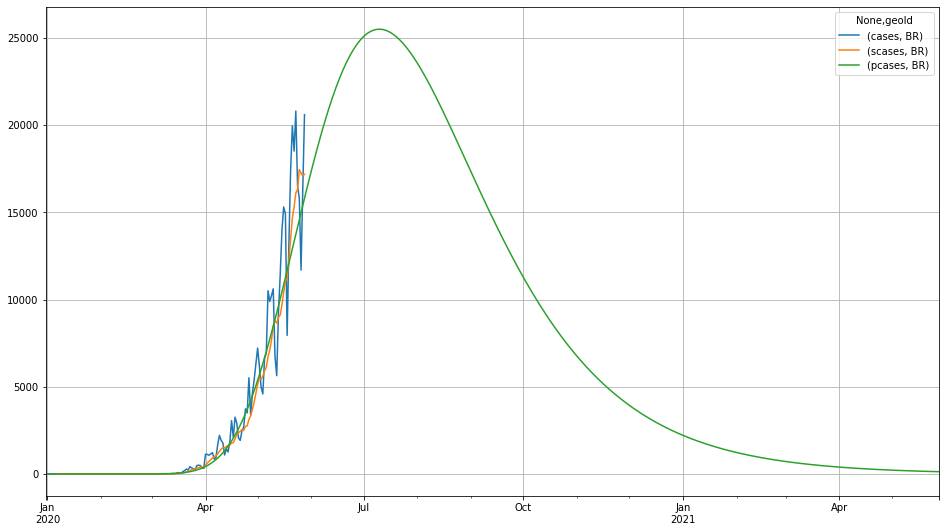

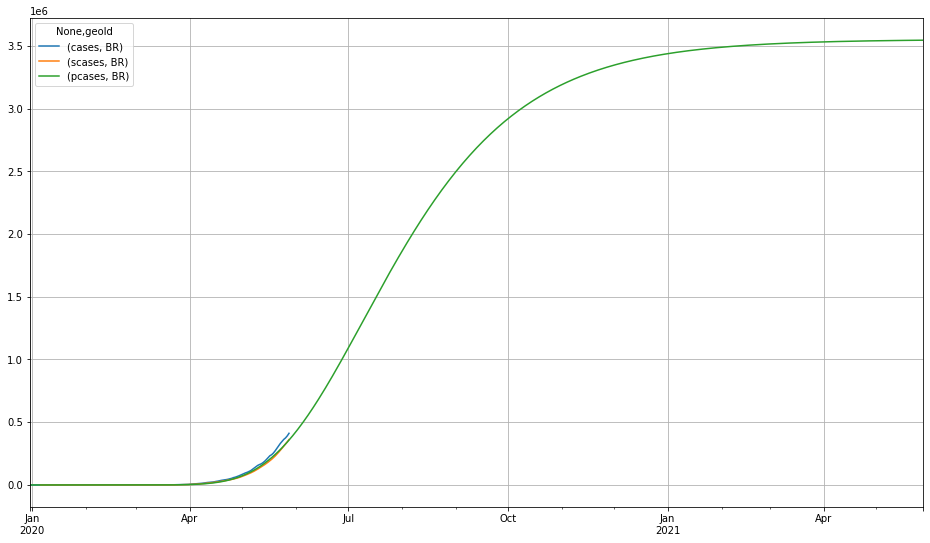

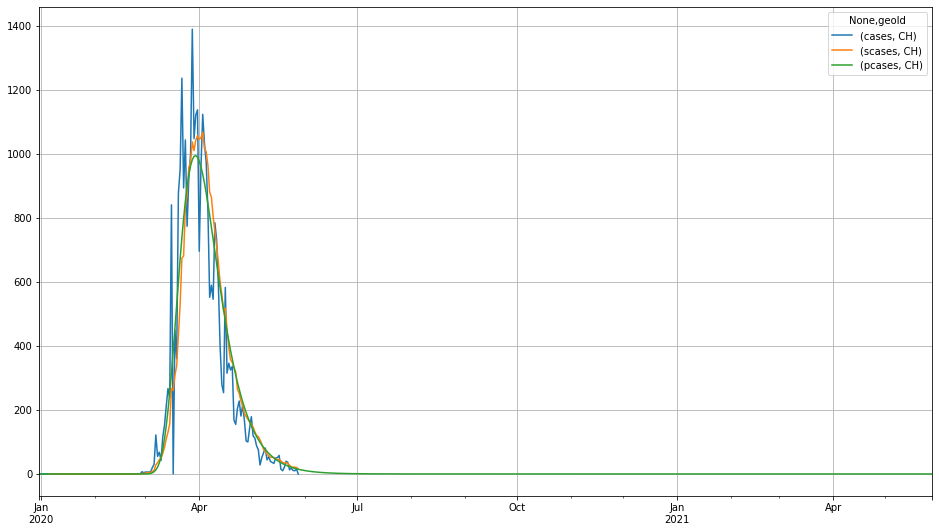

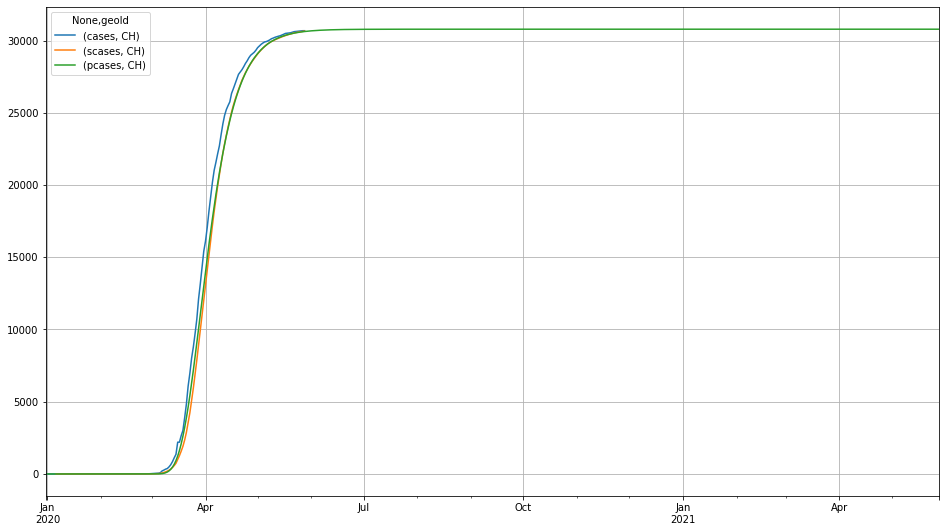

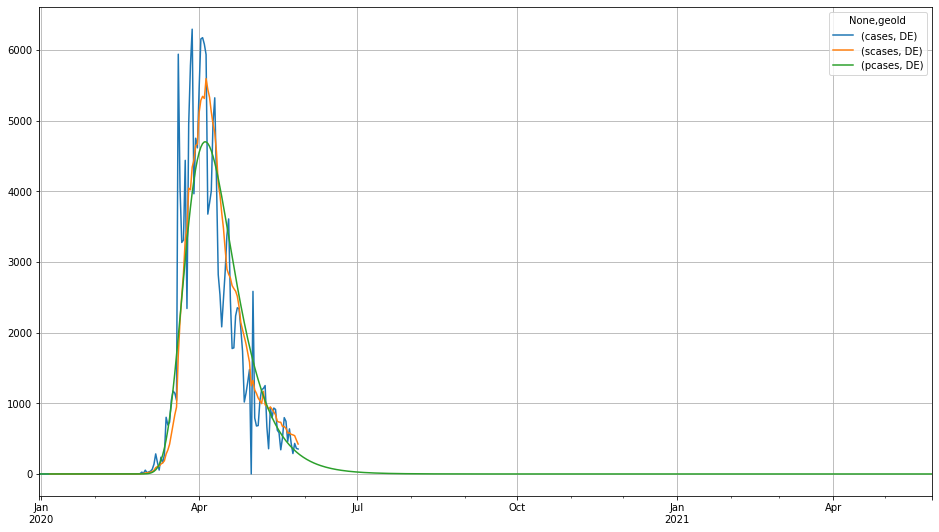

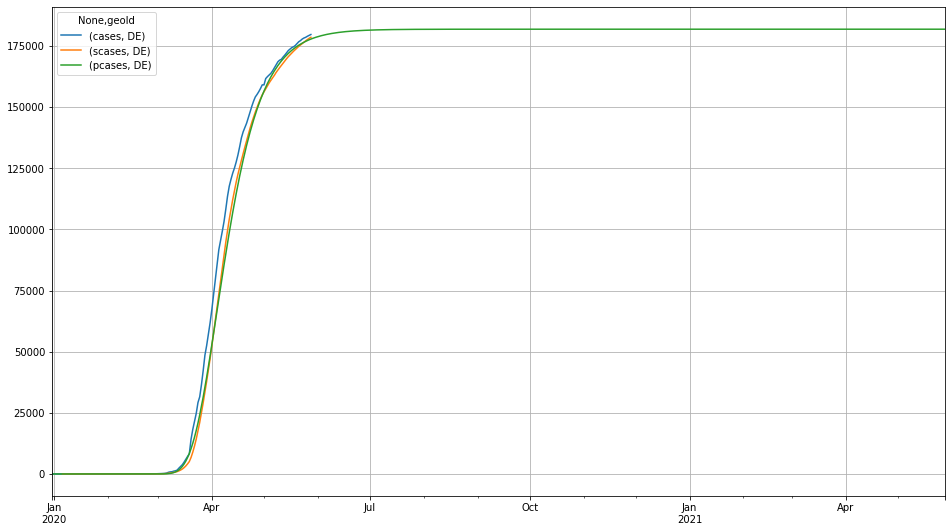

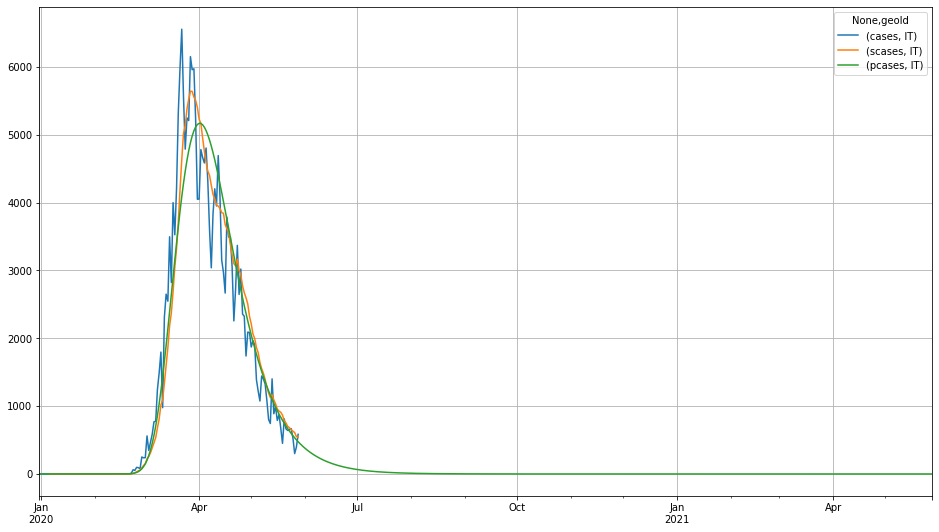

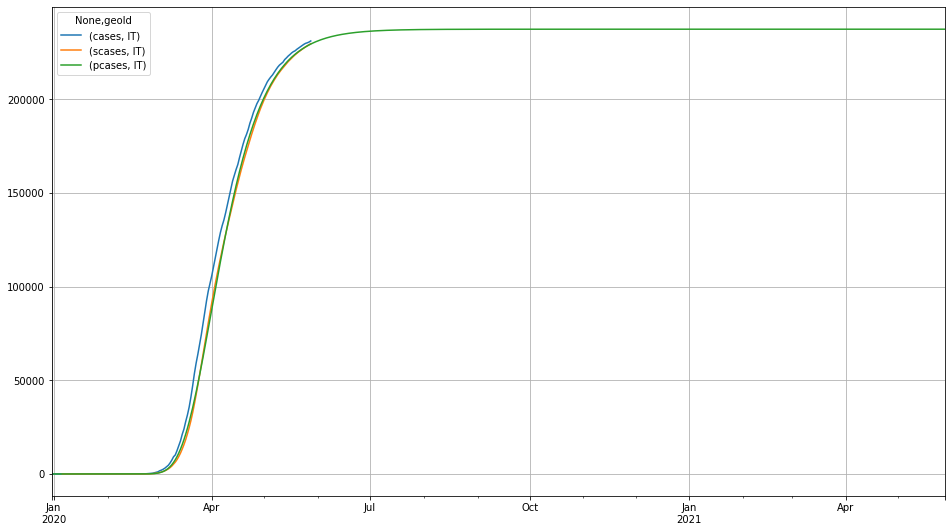

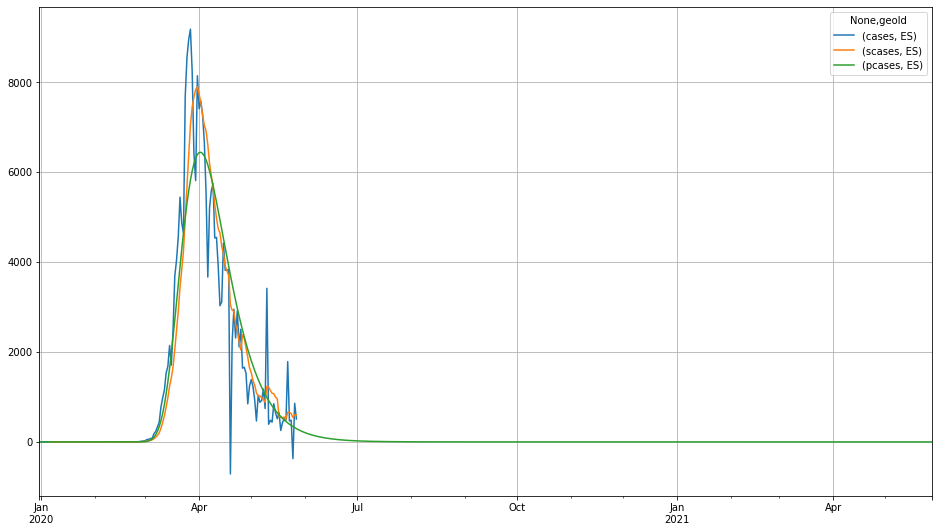

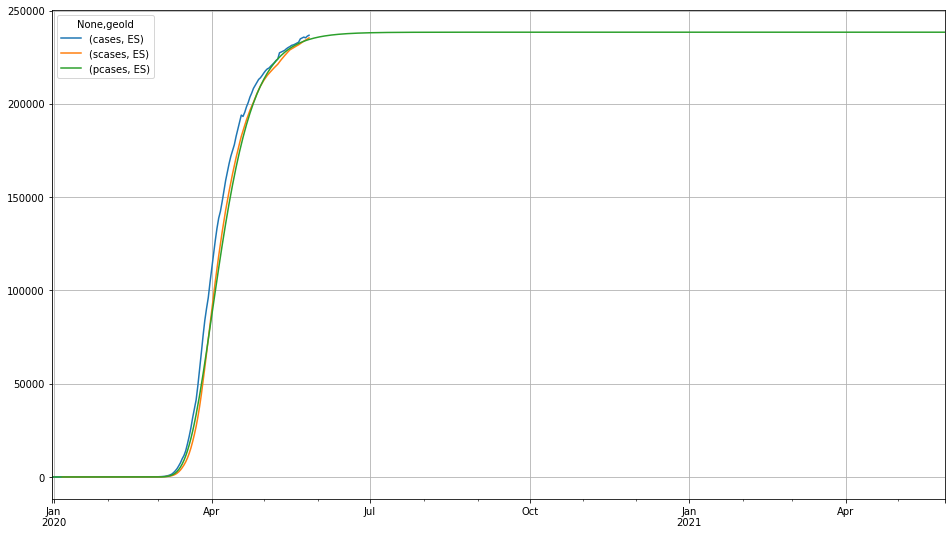

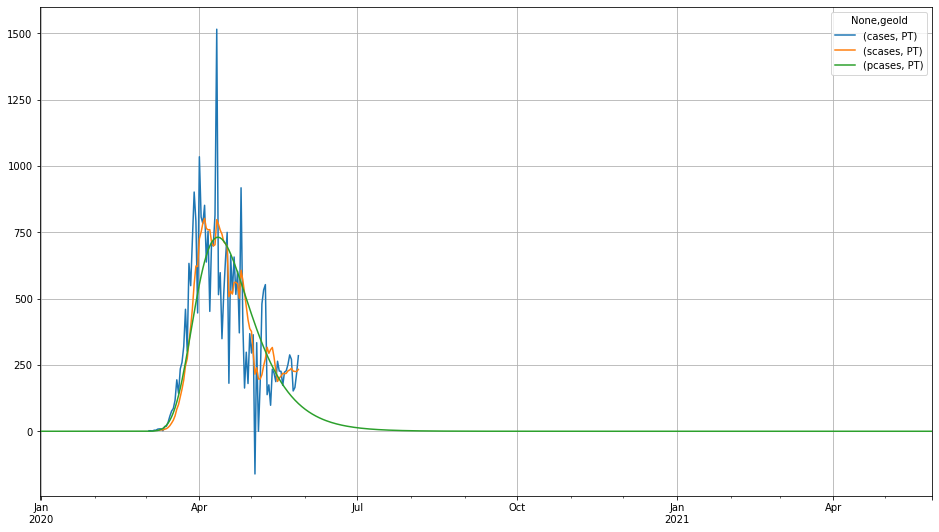

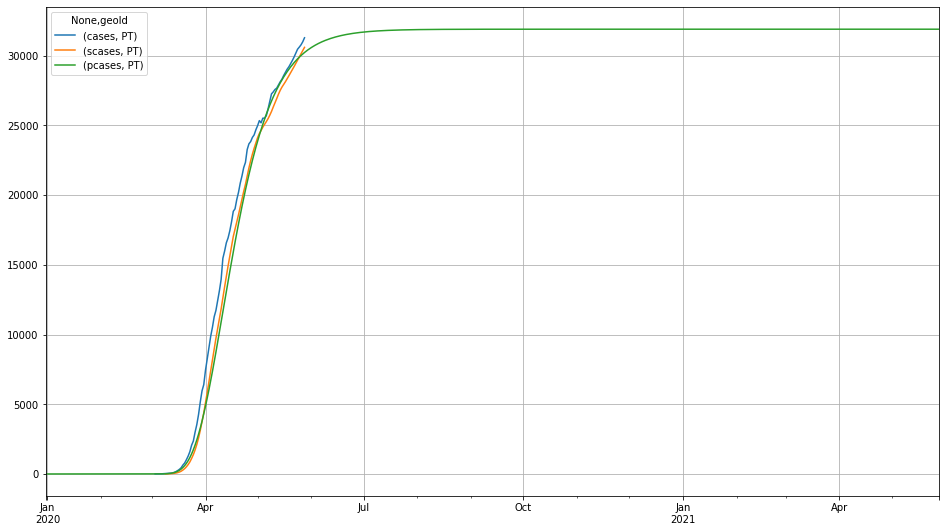

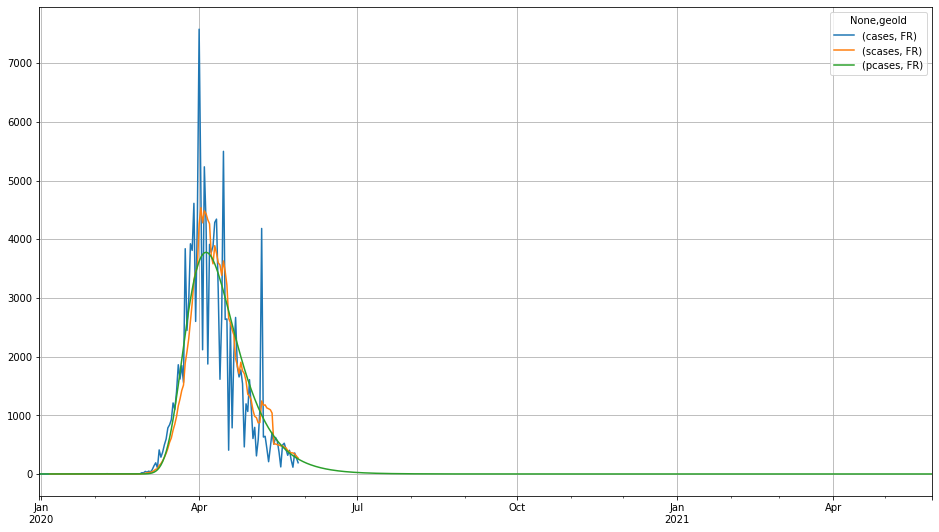

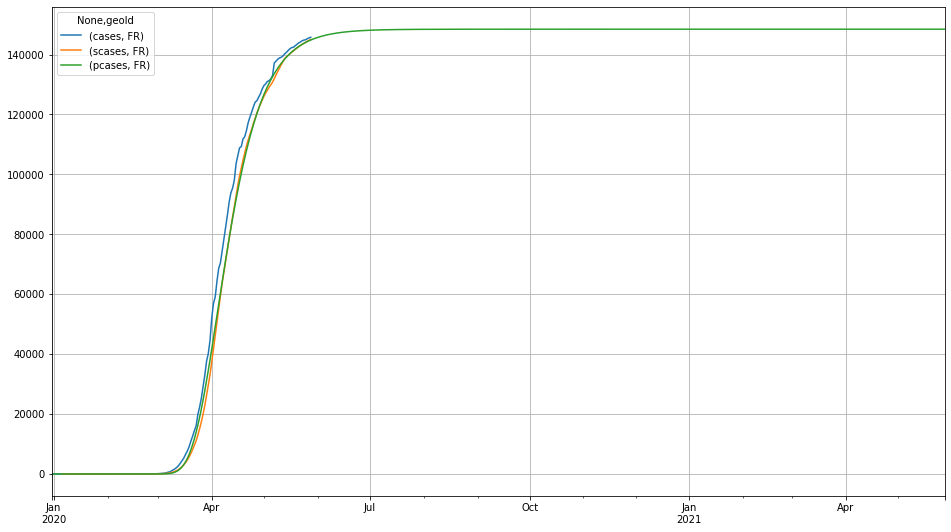

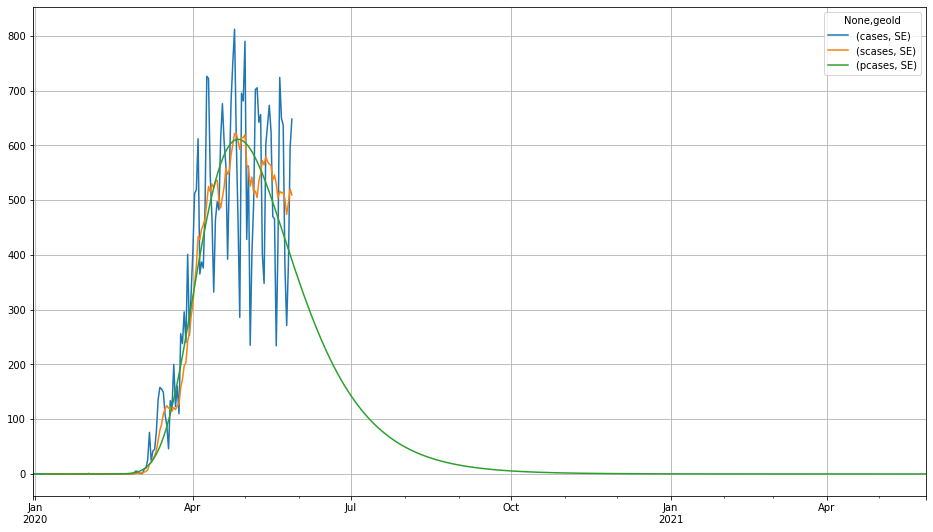

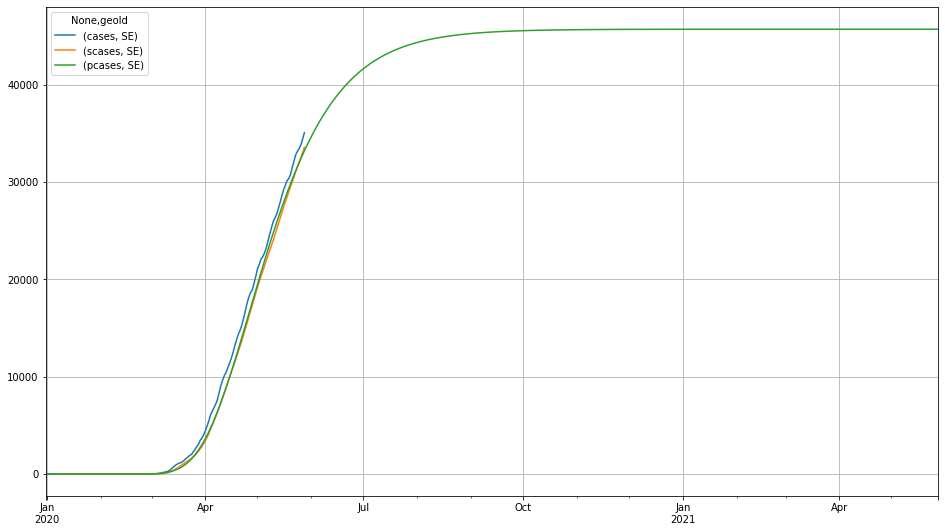

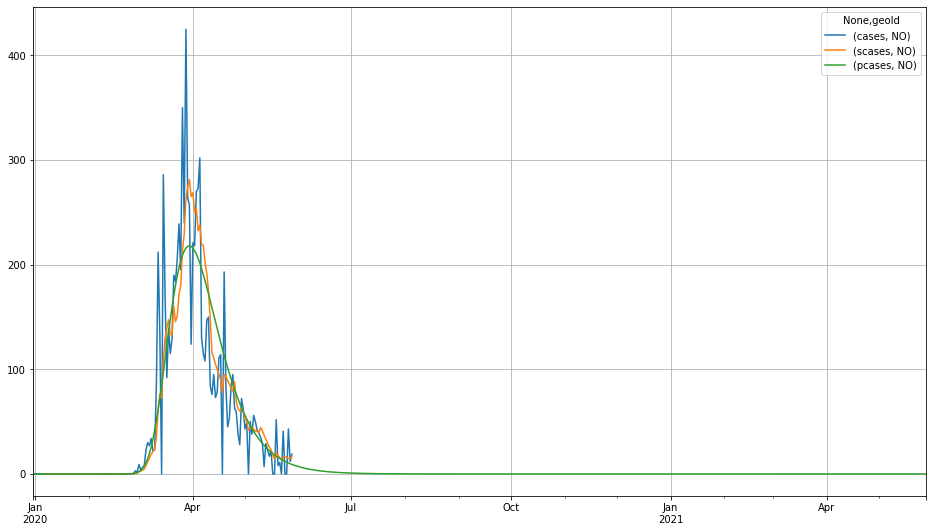

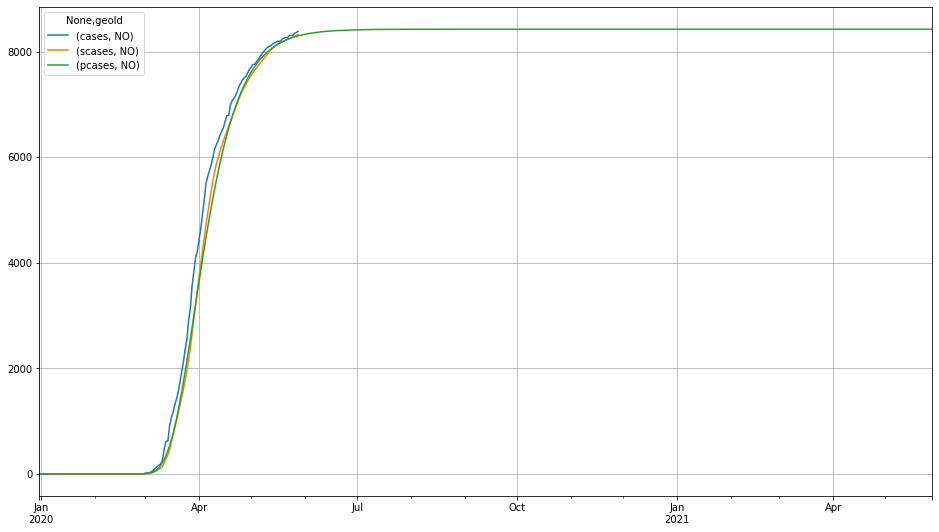

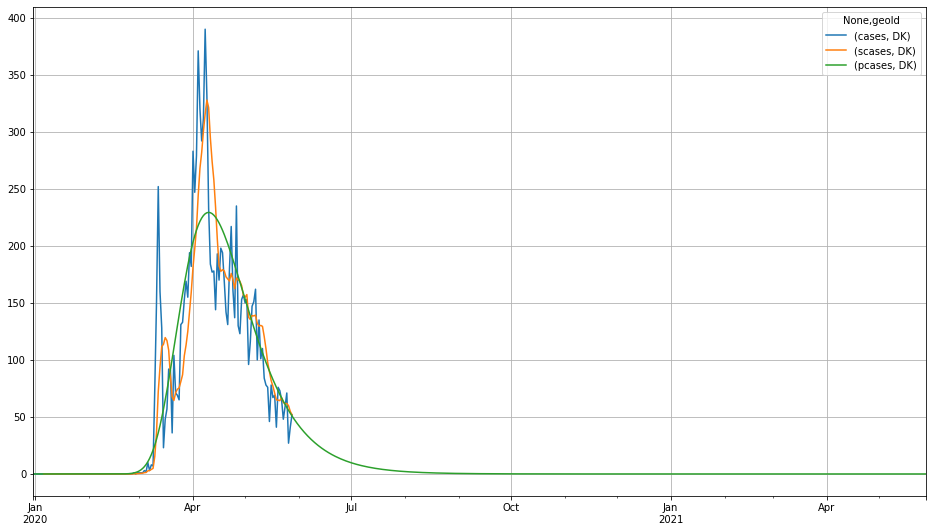

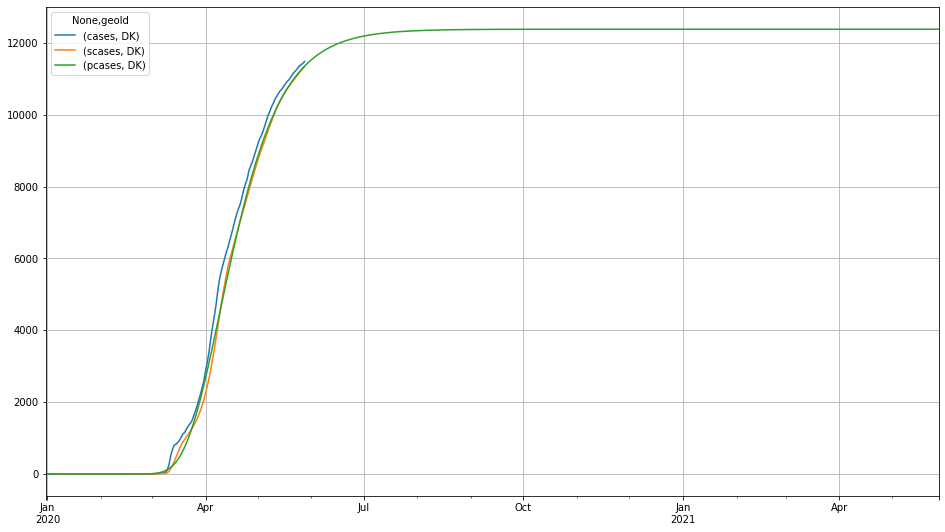

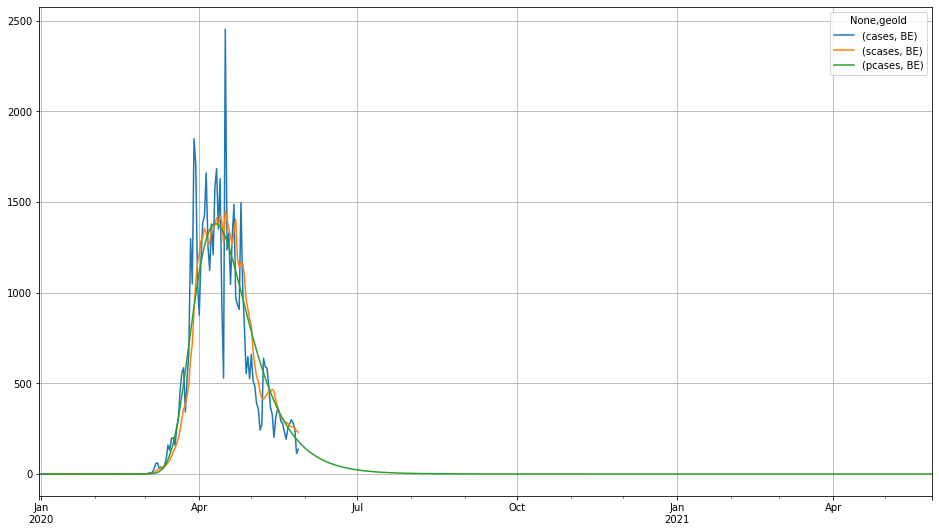

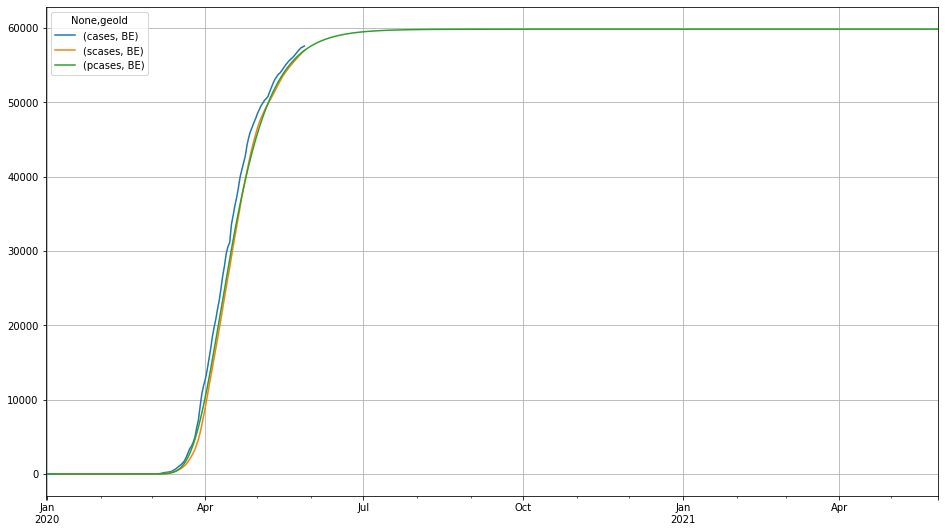

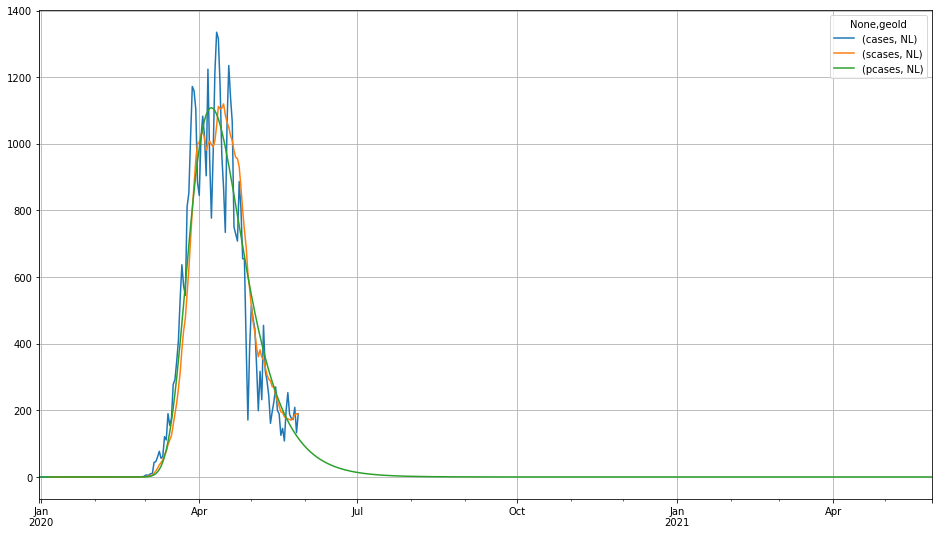

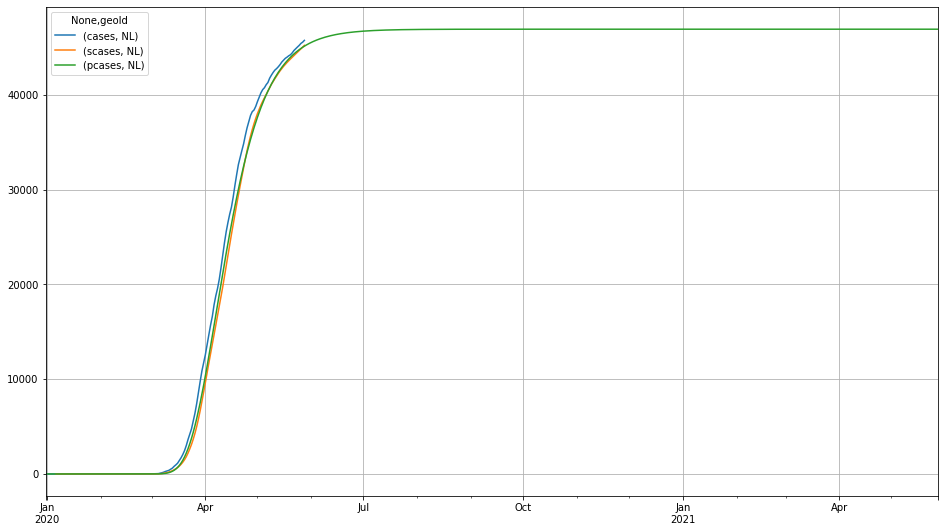

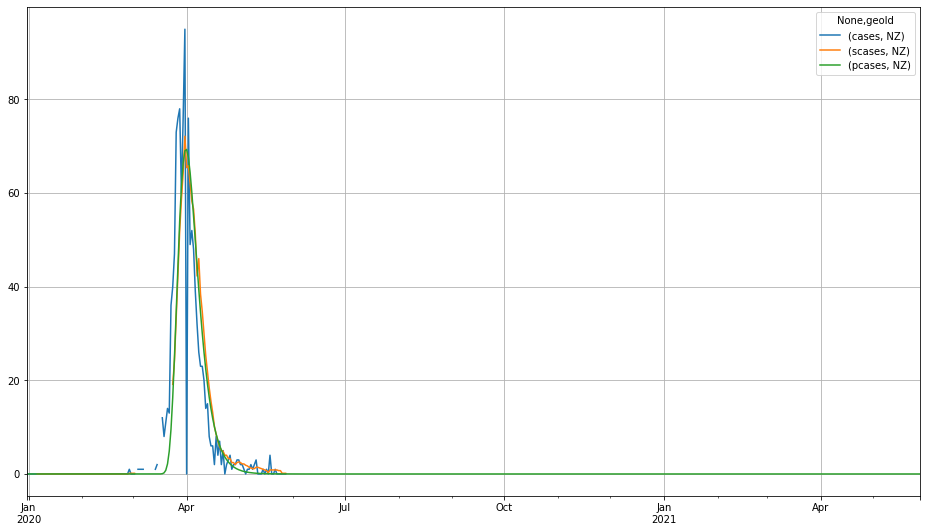

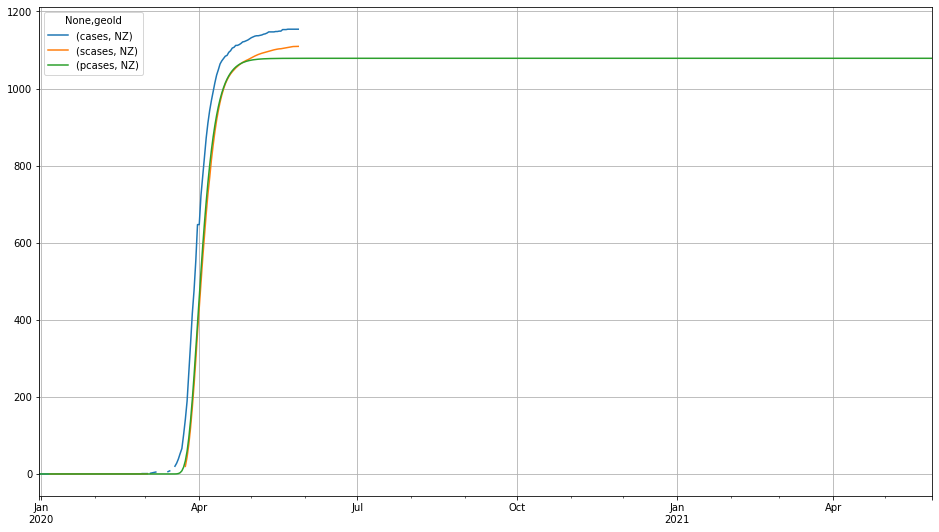

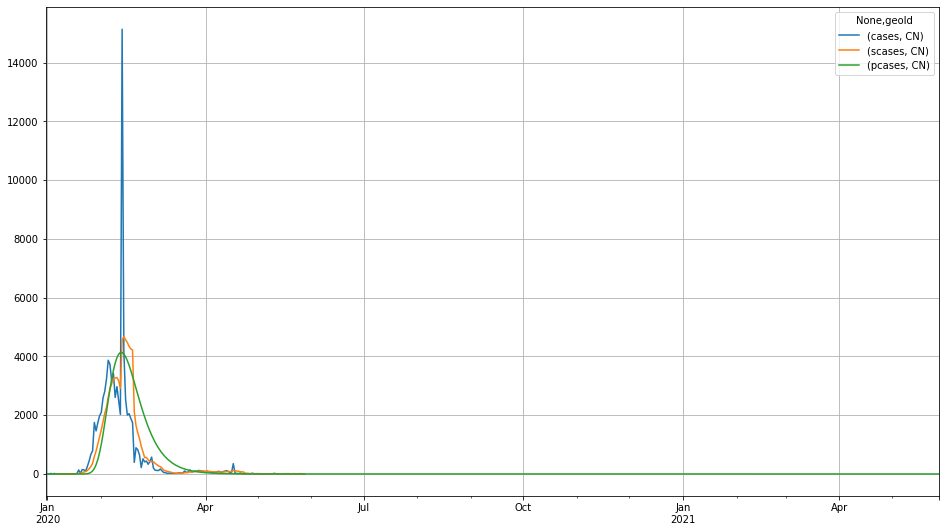

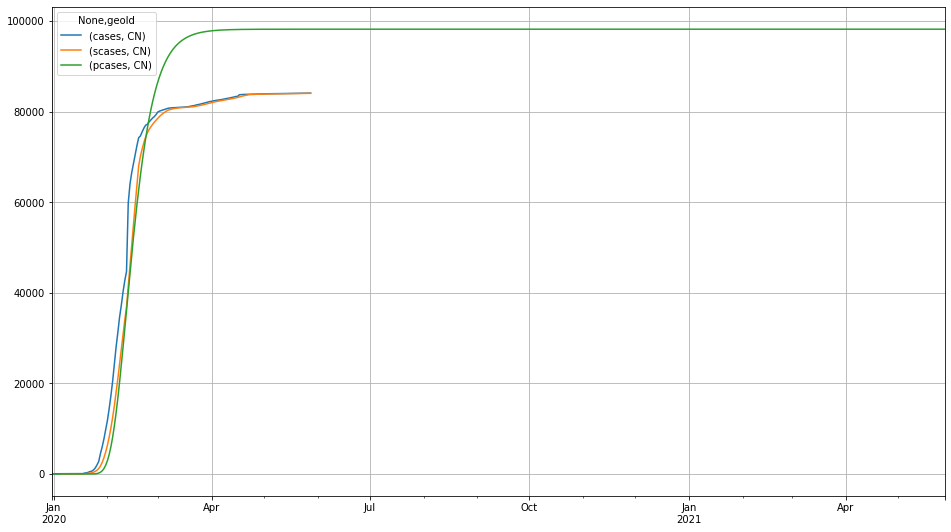

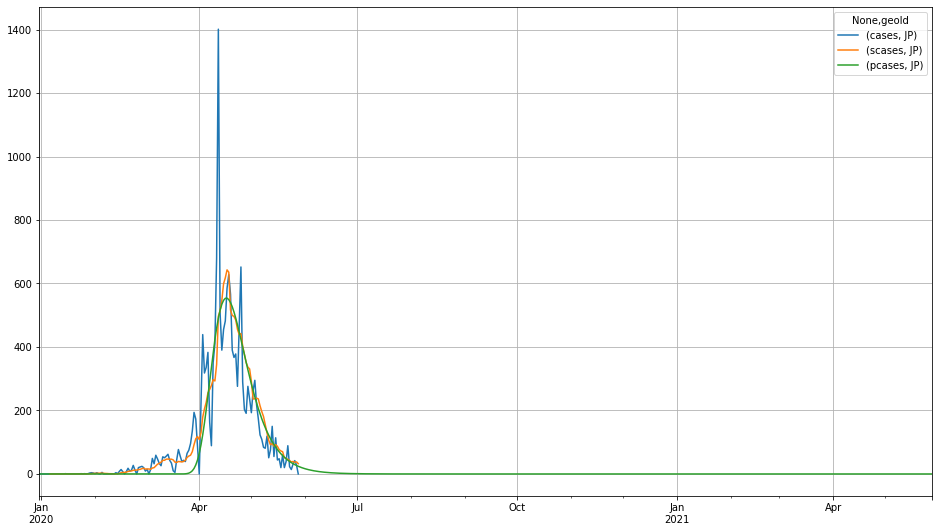

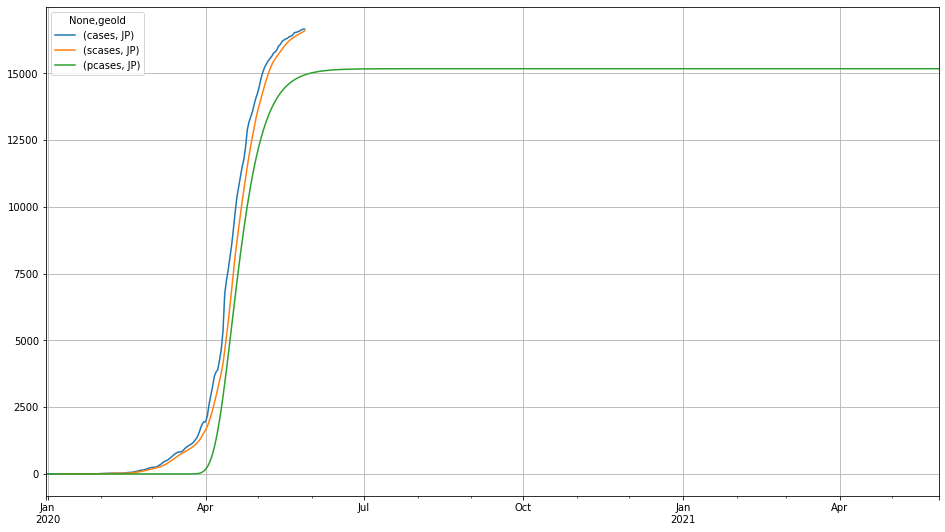

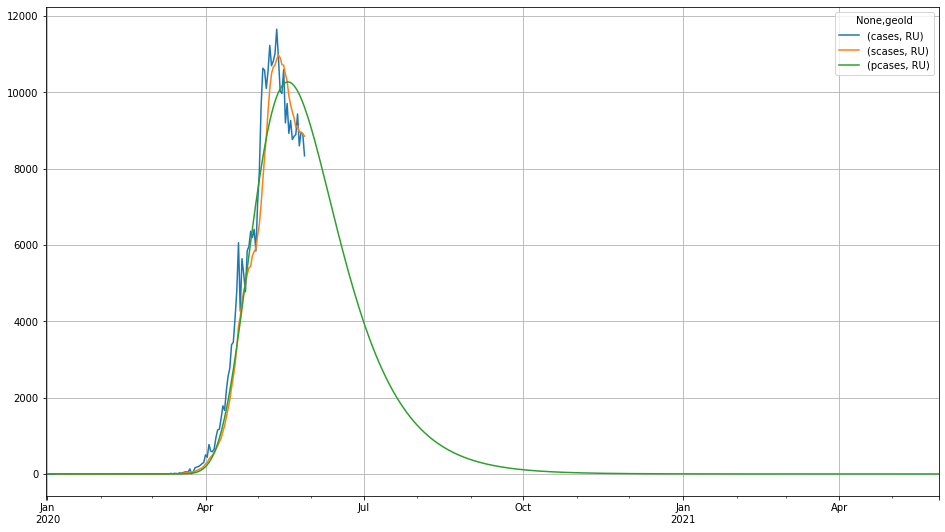

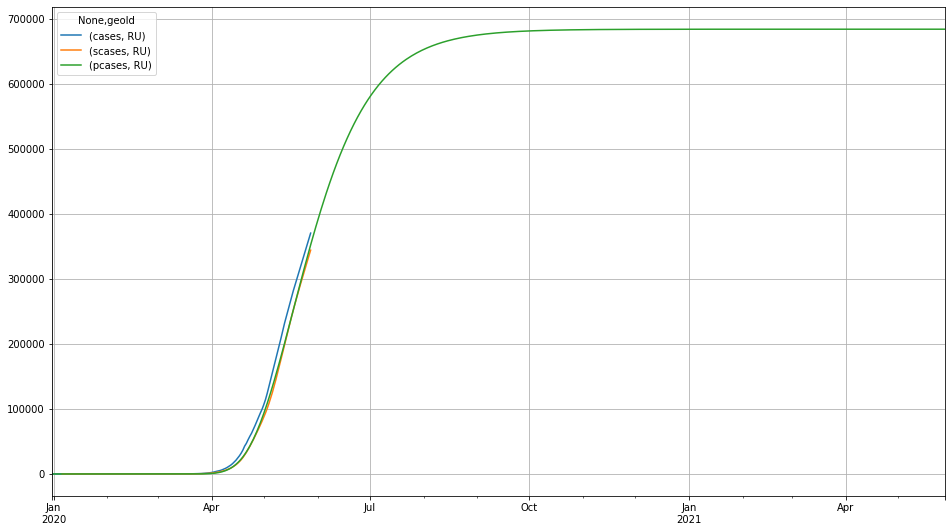

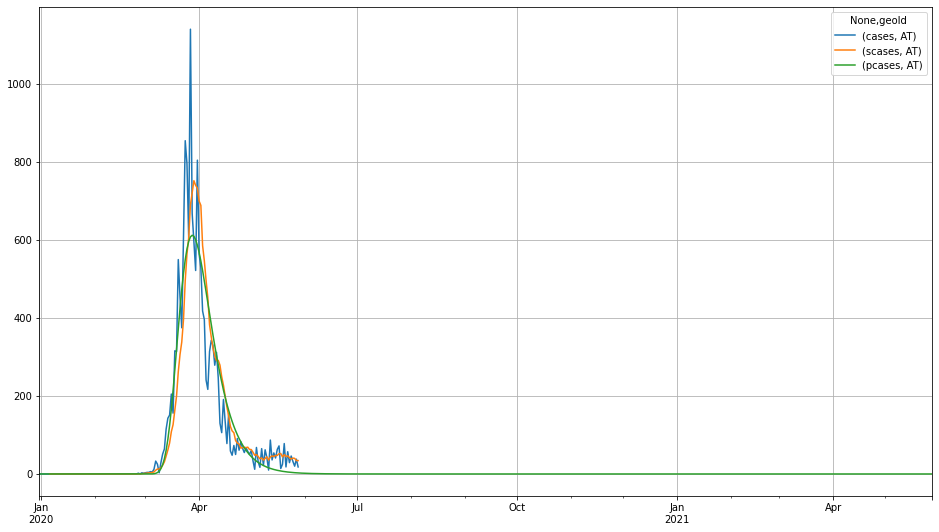

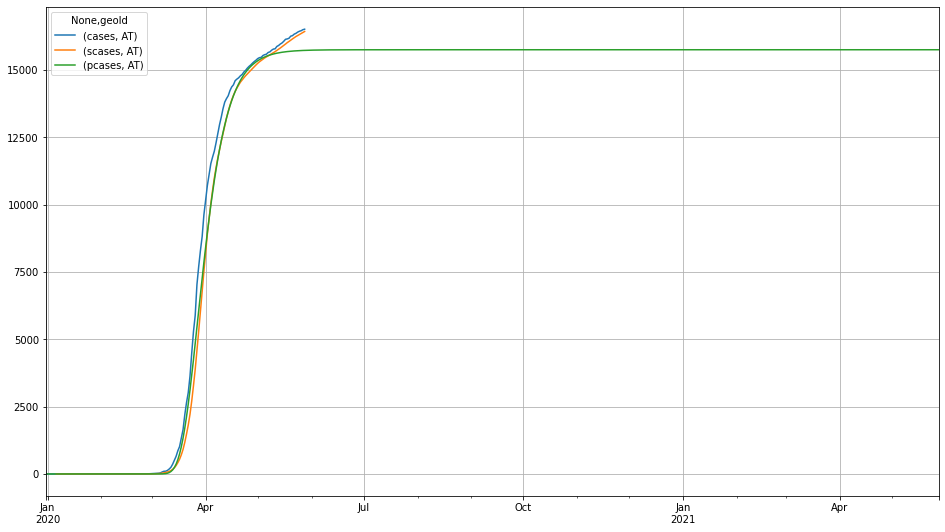

In [26]:
# Select countries to fit.
#countries = np.sort(df['geoId'].unique())
countries = ['US', 'UK', 'BR', 'CH', 'DE', 'IT', 'ES', 'PT', 'FR', 'SE', 'NO', 'DK', 'BE', 'NL', 'NZ', 'CN', 'JP', 'RU', 'AT']

# Choose whether to output plots per country.
showplots = True

# Create an output dataframe.
df_out = pd.DataFrame({
    'cname':np.nan,\
    'iso3':np.nan,\
    'ccont':np.nan,\
    'popdata':np.nan,\
    'res':np.nan,\
    'progress':np.nan,\
    'final':np.nan,\
    'start':np.nan,\
    'peak':np.nan,\
    'floor':np.nan,\
    'beta':np.nan,\
    'mu':np.nan},\
    index=countries)

# Choose measure to fit and variables to store predicted and smoothed measures.
measure  = 'cases'
smeasure = 'scases'
pmeasure = 'pcases'

def gumbelval(x, beta, mu):
    """Return the Gumbel CDF for x according to beta and mu"""
    return np.exp(- np.exp(- (x - mu) / beta))

def gumbelinv(x):
    """Inverse Gumbel function"""
    return(- np.log(- np.log(x)))

def fitres(progress):
    """Try to fit a line according to progress, returning residuals of fit"""
    global df_pred, fit
    
    # Scale the cumulative measure and keep cases below 1 for fitting
    df_pred['scaled'] = df_pred['cumul'] / numcases * progress
    df_fit = df_pred[df_pred['scaled'] < 1].copy()
    
    # Only try fitting if we have at least 10 measures left.
    if len(df_fit) > 9:
        df_fit['linear'] = gumbelinv(df_fit['scaled'])
        fit = np.polyfit(x=df_fit['daynum'], y=df_fit['linear'], deg=1, full=True)
        return(fit[1][0])
    else:
        return np.nan
    
from scipy.optimize import minimize_scalar

# Run the fitting approach for all countries.
for country in countries:
    df_geo[(smeasure, country)] = df_geo[measure][country].rolling(7).mean()
    df_pred = pd.DataFrame(
        {'daynum':df_geo['daynum'], measure:df_geo[smeasure][country]})
    
    # Extract country parameters from the original dataset.
    cname   = df[df['geoId'] == country]['countriesAndTerritories'].iloc[0]
    iso3    = df[df['geoId'] == country]['countryterritoryCode'].iloc[0]
    ccont   = df[df['geoId'] == country]['continentExp'].iloc[0]
    popdata = df[df['geoId'] == country]['popData2018'].iloc[0]

    # Current number of cases for scaling.
    numcases = df_pred[measure].sum()
    
    # We will only use measures above one in a million.
    mincases = popdata / 1e6
    df_pred = df_pred[df_pred[measure] > mincases]

    # Only start fitting if we have at least 10 measures.
    if len(df_pred) > 9:
        df_pred['cumul'] = df_pred[measure].cumsum()
        
        # Find the optimal fit.
        optim = minimize_scalar(fitres, method='bounded', bounds=(0.1, 1.5))
        progress = optim.x
        minfit = fitres(progress)
        
        # Calculate Gumbel beta and mu from our linear fit parameters.
        slope = fit[0][0]
        intercept = fit[0][1]
        beta = 1 / slope
        mu = - intercept / slope
        
        # Create predicted measures by calculating the Gumbel CDF and reduce to PDF.
        df_geo[(pmeasure, country)] = np.gradient(gumbelval(df_geo['daynum'], beta, mu) * numcases / progress)
 
        # Determine peak, floor, start and final analytically.
        peak = df_geo[(df_geo[(pmeasure, country)] > df_geo[(pmeasure, country)].shift(-1))].index.min()
        floor = df_geo[(df_geo[(pmeasure, country)] < (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index > peak)].index.min()
        start = df_geo[(df_geo[(pmeasure, country)] > (popdata / 1e6)) & (
            df_geo[(pmeasure, country)].index < peak)].index.min()
        final = df_geo[pmeasure][country].cumsum().max()
        
        # Create an output record and log results.
        df_out.loc[country] = [cname, iso3, ccont, popdata, optim.fun, progress, final, start.date(), peak.date(), floor.date(), beta, mu]
        print('{} Res {:6.3f} at {:3.0f}% of {:7.0f} start {} peak {} floor {} beta {:6.3f} mu {:7.3f}'.format(
            country, optim.fun, progress * 100, final, start.date(), peak.date(), floor.date(), beta, mu))
        
        # Show daily and cumulative results.
        if showplots:
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].plot(
                figsize=(16, 9), grid=True)
            df_geo[[(measure, country), (smeasure, country), (pmeasure, country)]].cumsum().plot(
                figsize=(16, 9), grid=True)
    else:
        df_out.loc[country] = [cname, iso3, ccont, popdata, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan]

Check the output frame assigning the index name.

In [27]:
df_out.index.name = 'iso2'
df_out

,cname,iso3,ccont,popdata,res,progress,final,start,peak,floor,beta,mu
iso2,,,,,,,,,,,,
US,United_States_of_America,USA,America,3.271674e+08,0.484336,0.874886,1.875848e+06,2020-03-13,2020-04-22,2020-08-11,19.550014,112.708897
UK,United_Kingdom,GBR,Europe,6.648899e+07,0.059161,0.852587,3.041946e+05,2020-03-14,2020-04-22,2020-08-08,19.796481,113.073717
BR,Brazil,BRA,America,2.094693e+08,0.061644,0.101760,3.544538e+06,2020-03-27,2020-07-10,2021-05-04,51.239091,192.094374
CH,Switzerland,CHE,Europe,8.516543e+06,0.217862,0.995693,3.078243e+04,2020-03-07,2020-03-30,2020-06-04,11.365640,89.781266
DE,Germany,DEU,Europe,8.292792e+07,0.552866,0.981770,1.818867e+05,2020-03-08,2020-04-05,2020-06-16,14.217543,95.500585
IT,Italy,ITA,Europe,6.043128e+07,0.077746,0.967374,2.374175e+05,2020-02-28,2020-04-01,2020-07-03,16.881902,92.395052
ES,Spain,ESP,Europe,4.672375e+07,0.707748,0.987149,2.383996e+05,2020-03-05,2020-04-02,2020-06-22,13.595950,92.684230
PT,Portugal,PRT,Europe,1.028176e+07,0.879139,0.959196,3.190752e+04,2020-03-11,2020-04-12,2020-07-05,16.029893,102.645645
FR,France,FRA,Europe,6.698724e+07,0.178271,0.976822,1.484458e+05,2020-03-08,2020-04-05,2020-06-17,14.447156,95.962642


Write out the values per country, discarding countries with progress below 10%.

In [28]:
df_out[df_out['progress'] > 0.101].to_csv("zzprogress.csv")

Keep exploring! Stay home, wash your hands, keep your distance.